In [3]:
import pandas as pd, numpy as np

In [164]:
df = pd.read_excel('DATASET.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [165]:
df.fillna(0, inplace=True)  
df.rename(columns = {'Unnamed: 0':'Sections'}, inplace = True)
for ind in range(len(df.iloc[:,0])):
  if df.iloc[ind,0]==0:
    df.iloc[ind,0] = df.iloc[ind-1,0]
df = df.drop(df.index[df.iloc[:,0]=="Sec_92"])

In [166]:
df.head()

,Sections,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [167]:
TestData = df[df.iloc[:,1] == 10]
TrainingData = df.drop(df.index[df.iloc[:,1] == 10])

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

In [156]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=25,max_depth=23,criterion='mse' )
etr = ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=100,min_impurity_decrease=0.0, min_samples_leaf=1,min_weight_fraction_leaf=0.1,n_jobs=None, oob_score=False, random_state=1, verbose=0,warm_start=False)

In [196]:
RMSE = {'Para-9':0, 'Para-10':0, 'Para-11':0, 'Para-12':0, 'Para-13':0}
Result_df = pd.DataFrame(columns=df.columns)
#df.loc[len(df.index)] = ['Amy', 89, 93] 
for section in np.unique(df.iloc[:,0]):
  targets = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
  Row_Pred = TestData.iloc[:,:10]
  Row_Pred = Row_Pred[Row_Pred.iloc[:,0] == str(section)]
  for target in targets:
    X_Train = TrainingData.iloc[:,:10]
    X_Train = X_Train[X_Train.iloc[:,0] == str(section)]
    X_Test = TestData.iloc[:,:10]
    X_Test = X_Test[X_Test.iloc[:,0] == str(section)]
    Y_Train = TrainingData[target]
    Y_Train = Y_Train.loc[X_Train.index[X_Train.iloc[:,0] == str(section)]]
    X_Train = X_Train.drop(['Sections'],axis=1)
    Y_Test = TestData[target]
    Y_Test = Y_Test.loc[X_Test.index[X_Test.iloc[:,0] == str(section)]]
    X_Test = X_Test.drop('Sections',axis=1)
    # forest.fit(X_Train,Y_Train)   
    # Y_Pred = forest.predict(X_Test)
    etr.fit(X_Train,Y_Train)                                                     
    Y_Pred = etr.predict(X_Test)
    Row_Pred[target] = Y_Pred
    MSE = np.square(np.subtract(Y_Test,Y_Pred)) 
    RMSE[target] = RMSE[target] + float(MSE)  #math.sqrt(MSE)
  Result_df = Result_df.append(Row_Pred)

In [197]:
RMSE

{'Para-9': 404057.63504850015,
 'Para-10': 407860.25342900015,
 'Para-11': 65637.69069999998,
 'Para-12': 21235.075699999998,
 'Para-13': 6.448698934457007}

In [198]:
NumberOfSections = len(np.unique(df.iloc[:,0]))
Error =  [ x/NumberOfSections for x in RMSE.values() ]
math.sqrt(sum(Error)/5)

42.39804485059269

In [176]:
import random
index = []
for i in range(0,20):
  index.append(random.randint(0,100))

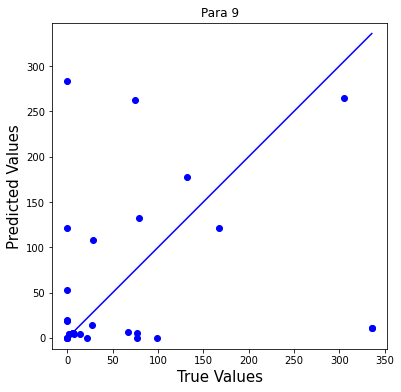

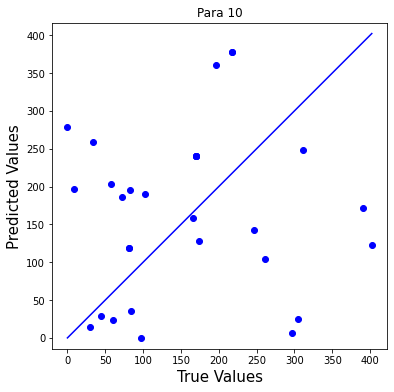

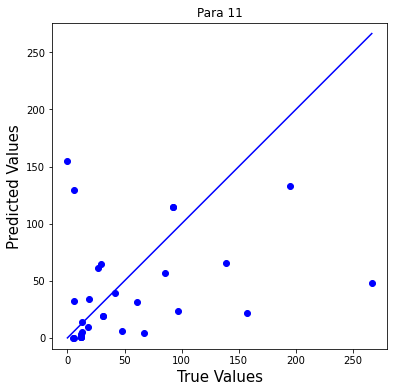

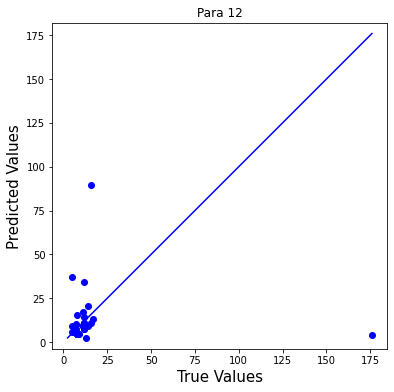

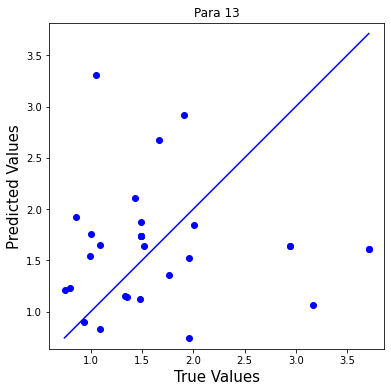

In [192]:
import random
index = []
for i in range(0,30):
  index.append(random.randint(0,100))
for i in range(5):
  plt.figure(figsize=(6,6))
  true_value = TestData.iloc[index, i+10 ]
  predicted_value = Result_df.iloc[index, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title("Para "+str(int(9+i)))
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predicted Values', fontsize=15)
  plt.axis('equal')
  plt.show()